In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/NNDL/HW2/Q3/Dataset.zip'


In [ ]:
!rm -rf "/content/Dataset/xray_dataset_covid19/augmentation"

In [ ]:
import tensorflow

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from PIL import Image

def rotate_images(folder_path, save_folder, angle):
    # Create the save folder if it doesn't exist
    if save_folder and not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            file_path = os.path.join(folder_path, filename)

            # Load the image
            image = load_img(file_path)
            image = img_to_array(image)

            # Rotate the image
            rotated_image = Image.fromarray(image.astype('uint8'), 'RGB').rotate(angle, expand=True)

            # Save the rotated image
            if save_folder:
                save_path = os.path.join(save_folder, str(angle)+filename)
            else:
                save_path = file_path  # Overwrite the original image

            rotated_image.save(save_path)



def flip_images(folder_path, save_folder, flip_horizontal=True, flip_vertical=False):
    # Create the save folder if it doesn't exist
    if save_folder and not os.path.exists(save_folder):
        os.makedirs(save_folder)

    for filename in os.listdir(folder_path):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            file_path = os.path.join(folder_path, filename)

            # Load the image
            image = load_img(file_path)
            image = img_to_array(image)
            image = Image.fromarray(image.astype('uint8'), 'RGB')

            # Flip the image if specified
            if flip_horizontal:
                image = image.transpose(Image.FLIP_LEFT_RIGHT)
            if flip_vertical:
                image = image.transpose(Image.FLIP_TOP_BOTTOM)

            # Save the flipped image
            if save_folder:
                save_path = os.path.join(save_folder, 'fillped'+filename)
            else:
                save_path = file_path  # Overwrite the original image

            image.save(save_path)

angles  = [0,90,180,270]
for angle in angles :
    folder_path = '/content/Dataset/xray_dataset_covid19/train/COVID'
    save_folder = '/content/Dataset/xray_dataset_covid19/augmentation/train/COVID'
    rotate_images(folder_path, save_folder , angle)

    folder_path = '/content/Dataset/xray_dataset_covid19/train/NORMAL'
    save_folder = '/content/Dataset/xray_dataset_covid19/augmentation/train/NORMAL'
    rotate_images(folder_path, save_folder , angle)


folder_path = '/content/Dataset/xray_dataset_covid19/train/COVID'
save_folder = '/content/Dataset/xray_dataset_covid19/augmentation/train/COVID'
flip_images(folder_path, save_folder)


folder_path = '/content/Dataset/xray_dataset_covid19/train/NORMAL'
save_folder = '/content/Dataset/xray_dataset_covid19/augmentation/train/NORMAL'
flip_images(folder_path, save_folder)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory ='/content/Dataset/xray_dataset_covid19/augmentation/train',
    image_size = (150, 150),
    validation_split = 0.15,
    subset = "training",
    seed = 42,
    shuffle = True
    )


val_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory ='/content/Dataset/xray_dataset_covid19/augmentation/train',
    image_size = (150, 150),
    validation_split = 0.15,
    subset = "validation",
    seed = 42,
    shuffle = True
    )


Found 740 files belonging to 2 classes.
Using 629 files for training.
Found 740 files belonging to 2 classes.
Using 111 files for validation.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Activation  # Add this import for Activation
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(64, (3, 3), activation=None, input_shape=(150, 150, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 4
model.add(Conv2D(128, (3, 3), activation=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 5
model.add(Conv2D(256, (3, 3), activation=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 6
model.add(Conv2D(256, (3, 3), padding='same', activation=None))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
# Fully Connected Layer 2
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(axis=-1))
# Fully Connected Layer 3
model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0006)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 148, 148, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        3

In [ ]:

history = model.fit(train_ds, epochs=50, batch_size=32, validation_data=val_ds)


Epoch 1/50
20/20 [==============================] - 29s 330ms/step - loss: 0.5604 - accuracy: 0.7758 - val_loss: 0.8093 - val_accuracy: 0.4865
Epoch 2/50
20/20 [==============================] - 11s 338ms/step - loss: 0.2728 - accuracy: 0.9030 - val_loss: 1.3377 - val_accuracy: 0.5135
Epoch 3/50
20/20 [==============================] - 10s 384ms/step - loss: 0.2690 - accuracy: 0.9030 - val_loss: 1.3293 - val_accuracy: 0.5135
Epoch 4/50
20/20 [==============================] - 9s 286ms/step - loss: 0.1914 - accuracy: 0.9253 - val_loss: 0.6495 - val_accuracy: 0.6126
Epoch 5/50
20/20 [==============================] - 11s 372ms/step - loss: 0.1803 - accuracy: 0.9173 - val_loss: 1.0721 - val_accuracy: 0.5946
Epoch 6/50
20/20 [==============================] - 8s 285ms/step - loss: 0.1237 - accuracy: 0.9475 - val_loss: 0.8308 - val_accuracy: 0.6667
Epoch 7/50
20/20 [==============================] - 10s 366ms/step - loss: 0.0750 - accuracy: 0.9698 - val_loss: 0.1897 - val_accuracy: 0.9099
E

In [ ]:
model.save('/content/drive/MyDrive/NNDL/HW2/Q3/NNDL_HW2_6layres.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


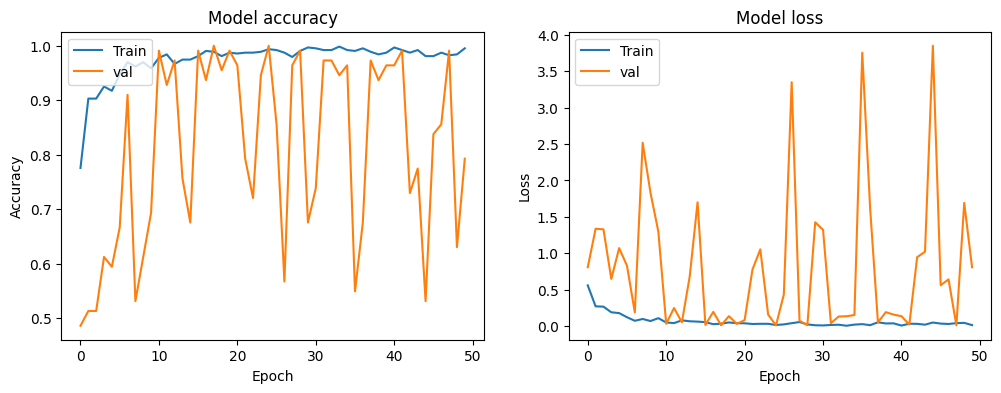

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')

    plt.show()

plot_loss_and_accuracy(history)



Found 40 files belonging to 2 classes.
2/2 [==============================] - 1s 193ms/step
              precision    recall  f1-score   support

       COVID       1.00      0.65      0.79        20
      NORMAL       0.74      1.00      0.85        20

    accuracy                           0.82        40
   macro avg       0.87      0.82      0.82        40
weighted avg       0.87      0.82      0.82        40

COVID - Sensitivity (Recall): 0.6500, Specificity: 1.0000
NORMAL - Sensitivity (Recall): 1.0000, Specificity: 0.6500


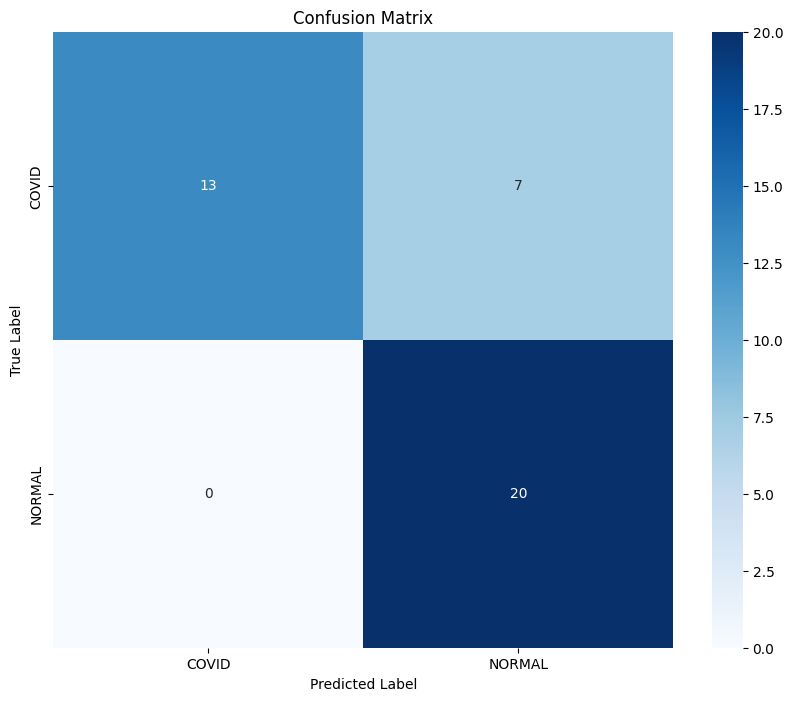

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

test_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory='/content/Dataset/xray_dataset_covid19/test',
    image_size=(150, 150),
    shuffle=False  # No need to shuffle the test dataset
)

# Make predictions
y_pred=model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())

y_pred=model.predict(test_ds)
y_pred = [np.rint(i)[0] for i in y_pred]
y_true = []
# Iterate through the dataset to collect unique labels
for images, labels in test_ds:
    y_true.extend(labels.numpy())
# Calculate metrics
print(classification_report(y_true, y_pred, target_names=test_ds.class_names))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate and print sensitivity and specificity for each class
for i, class_name in enumerate(test_ds.class_names):
    sensitivity = cm[i, i] / cm[i, :].sum()
    true_negatives = np.delete(np.delete(cm, i, axis=0), i, axis=1).sum()
    false_positives = cm[:, i].sum() - cm[i, i]
    specificity = true_negatives / (true_negatives + false_positives)
    print(f"{class_name} - Sensitivity (Recall): {sensitivity:.4f}, Specificity: {specificity:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=test_ds.class_names, yticklabels=test_ds.class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 46ms/step - loss: 0.4534 - accuracy: 0.8250


[0.4533718228340149, 0.824999988079071]

part 4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Activation  # Add this import for Activation
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model_1 = Sequential()

# Convolutional Layer 1
model_1.add(Conv2D(64, (3, 3), activation=None, input_shape=(150, 150, 3)))
model_1.add(BatchNormalization(axis=-1))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))



# Flatten the feature maps
model_1.add(Flatten())

# Fully Connected Layer 1
model_1.add(Dense(512, activation='relu'))
model_1.add(BatchNormalization(axis=-1))
# Fully Connected Layer 2
model_1.add(Dense(256, activation='relu'))
model_1.add(BatchNormalization(axis=-1))
# Fully Connected Layer 3
model_1.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0006)

# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_8 (Bat  (None, 148, 148, 64)      256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 350464)           

In [ ]:
history_1 = model_1.fit(train_ds, epochs=12, batch_size=32, validation_data=val_ds)

Epoch 1/12
20/20 [==============================] - 13s 403ms/step - loss: 0.3561 - accuracy: 0.8680 - val_loss: 3.8913 - val_accuracy: 0.6937
Epoch 2/12
20/20 [==============================] - 11s 308ms/step - loss: 0.0913 - accuracy: 0.9762 - val_loss: 1.5153 - val_accuracy: 0.7477
Epoch 3/12
20/20 [==============================] - 9s 306ms/step - loss: 0.0475 - accuracy: 0.9905 - val_loss: 1.7460 - val_accuracy: 0.6847
Epoch 4/12
20/20 [==============================] - 9s 295ms/step - loss: 0.0196 - accuracy: 0.9984 - val_loss: 0.8599 - val_accuracy: 0.7838
Epoch 5/12
20/20 [==============================] - 11s 404ms/step - loss: 0.0181 - accuracy: 0.9984 - val_loss: 0.9950 - val_accuracy: 0.7568
Epoch 6/12
20/20 [==============================] - 10s 365ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.6841 - val_accuracy: 0.8018
Epoch 7/12
20/20 [==============================] - 9s 287ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9459
Ep

In [ ]:
model_1.save('/content/drive/MyDrive/NNDL/HW2/Q3/NNDL_HW2_1layres.h5')

In [ ]:
model_1.evaluate(test_ds)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Activation  # Add this import for Activation
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model_2 = Sequential()

# Convolutional Layer 1
model_2.add(Conv2D(64, (3, 3), activation=None, input_shape=(150, 150, 3)))
model_2.add(BatchNormalization(axis=-1))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

# Convolutional Layer 2
model_2.add(Conv2D(64, (3, 3), activation=None))
model_2.add(BatchNormalization(axis=-1))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))


# Flatten the feature maps
model_2.add(Flatten())

# Fully Connected Layer 1
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization(axis=-1))
# Fully Connected Layer 2
model_2.add(Dense(256, activation='relu'))
model_2.add(BatchNormalization(axis=-1))
# Fully Connected Layer 3
model_2.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0006)

# Compile the model
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model_2.summary()

In [ ]:
history_2 = model_2.fit(train_ds, epochs=12, batch_size=32, validation_data=val_ds)

Epoch 1/12
20/20 [==============================] - 8s 289ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9820
Epoch 2/12
20/20 [==============================] - 10s 286ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.6316 - val_accuracy: 0.8198
Epoch 3/12
20/20 [==============================] - 11s 432ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 1.5346 - val_accuracy: 0.6847
Epoch 4/12
20/20 [==============================] - 8s 286ms/step - loss: 0.0383 - accuracy: 0.9889 - val_loss: 0.5754 - val_accuracy: 0.8919
Epoch 5/12
20/20 [==============================] - 11s 402ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9640
Epoch 6/12
20/20 [==============================] - 9s 306ms/step - loss: 0.0225 - accuracy: 0.9952 - val_loss: 0.3320 - val_accuracy: 0.9009
Epoch 7/12
20/20 [==============================] - 25s 862ms/step - loss: 0.0156 - accuracy: 0.9968 - val_loss: 2.5350 - val_accuracy: 0.6036
Ep

In [ ]:
model_2.save('/content/drive/MyDrive/NNDL/HW2/Q3/NNDL_HW2_2layres.h5')

In [ ]:
model_2.evaluate(test_ds)

2/2 [==============================] - 0s 59ms/step - loss: 0.0436 - accuracy: 1.0000


[0.04359791427850723, 1.0]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Activation  # Add this import for Activation
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model_3 = Sequential()

# Convolutional Layer 1
model_3.add(Conv2D(64, (3, 3), activation=None, input_shape=(150, 150, 3)))
model_3.add(BatchNormalization(axis=-1))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

# Convolutional Layer 2
model_3.add(Conv2D(64, (3, 3), activation=None))
model_3.add(BatchNormalization(axis=-1))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

# Convolutional Layer 3
model_3.add(Conv2D(128, (3, 3), activation=None))
model_3.add(BatchNormalization(axis=-1))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))


# Flatten the feature maps
model_3.add(Flatten())

# Fully Connected Layer 1
model_3.add(Dense(512, activation='relu'))
model_3.add(BatchNormalization(axis=-1))
# Fully Connected Layer 2
model_3.add(Dense(256, activation='relu'))
model_3.add(BatchNormalization(axis=-1))
# Fully Connected Layer 3
model_3.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0006)

# Compile the model
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model_3.summary()

In [ ]:
history_3 = model_3.fit(train_ds, epochs=12, batch_size=32, validation_data=val_ds)

Epoch 1/12
20/20 [==============================] - 14s 326ms/step - loss: 0.2452 - accuracy: 0.9141 - val_loss: 2.5082 - val_accuracy: 0.5856
Epoch 2/12
20/20 [==============================] - 11s 319ms/step - loss: 0.0755 - accuracy: 0.9730 - val_loss: 5.7207 - val_accuracy: 0.5135
Epoch 3/12
20/20 [==============================] - 10s 393ms/step - loss: 0.0487 - accuracy: 0.9873 - val_loss: 5.8375 - val_accuracy: 0.5135
Epoch 4/12
20/20 [==============================] - 8s 283ms/step - loss: 0.0224 - accuracy: 0.9921 - val_loss: 1.1161 - val_accuracy: 0.6396
Epoch 5/12
20/20 [==============================] - 10s 361ms/step - loss: 0.0396 - accuracy: 0.9841 - val_loss: 0.1432 - val_accuracy: 0.9189
Epoch 6/12
20/20 [==============================] - 9s 355ms/step - loss: 0.0303 - accuracy: 0.9889 - val_loss: 0.1416 - val_accuracy: 0.9279
Epoch 7/12
20/20 [==============================] - 8s 279ms/step - loss: 0.0184 - accuracy: 0.9952 - val_loss: 0.1470 - val_accuracy: 0.9550
Ep

In [ ]:
model_3.save('/content/drive/MyDrive/NNDL/HW2/Q3/NNDL_HW2_3layres.h5')

In [ ]:
model_3.evaluate(test_ds)

2/2 [==============================] - 0s 50ms/step - loss: 0.0882 - accuracy: 0.9500


[0.08818957954645157, 0.949999988079071]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Activation  # Add this import for Activation
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model_4 = Sequential()

# Convolutional Layer 1
model_4.add(Conv2D(64, (3, 3), activation=None, input_shape=(150, 150, 3)))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.2))

# Convolutional Layer 2
model_4.add(Conv2D(64, (3, 3), activation=None))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.2))

# Convolutional Layer 3
model_4.add(Conv2D(128, (3, 3), activation=None))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.2))

# Convolutional Layer 4
model_4.add(Conv2D(128, (3, 3), activation=None))
model_4.add(BatchNormalization(axis=-1))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.2))



# Flatten the feature maps
model_4.add(Flatten())

# Fully Connected Layer 1
model_4.add(Dense(512, activation='relu'))
model_4.add(BatchNormalization(axis=-1))
# Fully Connected Layer 2
model_4.add(Dense(256, activation='relu'))
model_4.add(BatchNormalization(axis=-1))
# Fully Connected Layer 3
model_4.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0006)

# Compile the model
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_40 (Ba  (None, 148, 148, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_26 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 72, 72, 64)       

In [ ]:
history_4 = model_4.fit(train_ds, epochs=12, batch_size=32, validation_data=val_ds)

Epoch 1/12
20/20 [==============================] - 15s 288ms/step - loss: 0.3156 - accuracy: 0.8776 - val_loss: 2.8003 - val_accuracy: 0.5135
Epoch 2/12
20/20 [==============================] - 11s 413ms/step - loss: 0.1505 - accuracy: 0.9475 - val_loss: 3.9720 - val_accuracy: 0.5225
Epoch 3/12
20/20 [==============================] - 11s 299ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 1.6289 - val_accuracy: 0.5766
Epoch 4/12
20/20 [==============================] - 8s 285ms/step - loss: 0.0421 - accuracy: 0.9889 - val_loss: 1.0759 - val_accuracy: 0.6396
Epoch 5/12
20/20 [==============================] - 10s 290ms/step - loss: 0.0554 - accuracy: 0.9762 - val_loss: 2.3372 - val_accuracy: 0.5766
Epoch 6/12
20/20 [==============================] - 11s 441ms/step - loss: 0.0636 - accuracy: 0.9762 - val_loss: 0.7678 - val_accuracy: 0.7027
Epoch 7/12
20/20 [==============================] - 8s 282ms/step - loss: 0.0722 - accuracy: 0.9698 - val_loss: 4.0359 - val_accuracy: 0.5045
E

In [ ]:
model_4.save('/content/drive/MyDrive/NNDL/HW2/Q3/NNDL_HW2_4layres.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_4.evaluate(test_ds)

2/2 [==============================] - 0s 44ms/step - loss: 0.0495 - accuracy: 0.9750


[0.04954029992222786, 0.9750000238418579]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Activation  # Add this import for Activation
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model_5 = Sequential()

# Convolutional Layer 1
model_5.add(Conv2D(64, (3, 3), activation=None, input_shape=(150, 150, 3)))
model_5.add(BatchNormalization(axis=-1))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.2))

# Convolutional Layer 2
model_5.add(Conv2D(64, (3, 3), activation=None))
model_5.add(BatchNormalization(axis=-1))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.2))

# Convolutional Layer 3
model_5.add(Conv2D(128, (3, 3), activation=None))
model_5.add(BatchNormalization(axis=-1))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.2))

# Convolutional Layer 4
model_5.add(Conv2D(128, (3, 3), activation=None))
model_5.add(BatchNormalization(axis=-1))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.2))

# Convolutional Layer 5
model_5.add(Conv2D(256, (3, 3), activation=None))
model_5.add(BatchNormalization(axis=-1))
model_5.add(Activation('relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.2))



# Flatten the feature maps
model_5.add(Flatten())

# Fully Connected Layer 1
model_5.add(Dense(512, activation='relu'))
model_5.add(BatchNormalization(axis=-1))
# Fully Connected Layer 2
model_5.add(Dense(256, activation='relu'))
model_5.add(BatchNormalization(axis=-1))
# Fully Connected Layer 3
model_5.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.0006)

# Compile the model
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print the model summary
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_33 (Ba  (None, 148, 148, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_21 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)       

In [ ]:
history_5 = model_5.fit(train_ds, epochs=12, batch_size=32, validation_data=val_ds)

Epoch 1/12
20/20 [==============================] - 17s 331ms/step - loss: 0.4278 - accuracy: 0.8362 - val_loss: 2.8079 - val_accuracy: 0.5135
Epoch 2/12
20/20 [==============================] - 10s 354ms/step - loss: 0.2686 - accuracy: 0.9126 - val_loss: 3.1670 - val_accuracy: 0.5135
Epoch 3/12
20/20 [==============================] - 9s 288ms/step - loss: 0.1656 - accuracy: 0.9380 - val_loss: 5.7520 - val_accuracy: 0.5135
Epoch 4/12
20/20 [==============================] - 12s 424ms/step - loss: 0.1404 - accuracy: 0.9523 - val_loss: 1.2294 - val_accuracy: 0.5135
Epoch 5/12
20/20 [==============================] - 10s 363ms/step - loss: 0.1460 - accuracy: 0.9507 - val_loss: 0.9612 - val_accuracy: 0.5856
Epoch 6/12
20/20 [==============================] - 10s 293ms/step - loss: 0.1221 - accuracy: 0.9523 - val_loss: 0.6020 - val_accuracy: 0.7568
Epoch 7/12
20/20 [==============================] - 11s 430ms/step - loss: 0.0885 - accuracy: 0.9650 - val_loss: 0.3402 - val_accuracy: 0.8559


In [ ]:
model_5.save('/content/drive/MyDrive/NNDL/HW2/Q3/NNDL_HW2_5layres.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_5.evaluate(test_ds)

2/2 [==============================] - 1s 114ms/step - loss: 0.2531 - accuracy: 0.9250


[0.2531324028968811, 0.925000011920929]

In [ ]:
models = [ model_1, model_2, model_3, model_4, model_5 , model]
test_accuracies = []
test_losses = []

for model in models:
    loss, accuracy = model.evaluate(test_ds)
    test_losses.append(loss)
    test_accuracies.append(accuracy)

2/2 [==============================] - 0s 59ms/step - loss: 0.2531 - accuracy: 0.9250


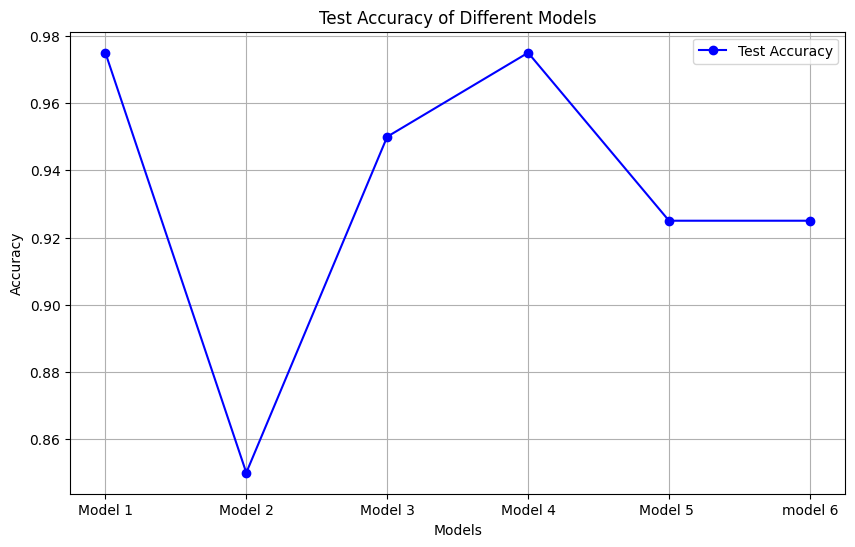

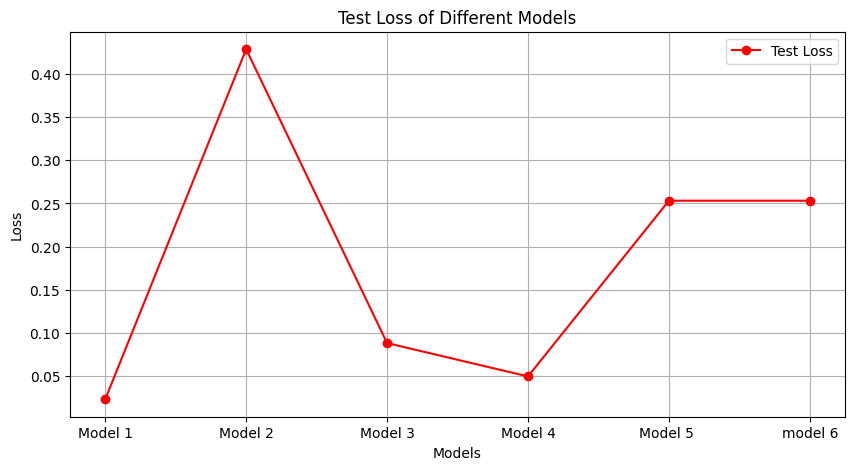

In [ ]:
import matplotlib.pyplot as plt

model_names = ["Model 1", "Model 2", "Model 3", "Model 4", "Model 5 ","model 6"]


# Indices for x-axis
x_indices = range(len(model_names))

# Plotting test accuracy
plt.figure(figsize=(10, 6))
plt.plot(x_indices, test_accuracies, marker='o', linestyle='-', color='blue', label='Test Accuracy')
plt.xticks(ticks=x_indices, labels=model_names)  # Set model names as x-axis labels
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Plotting test loss
plt.figure(figsize=(10, 5))
plt.plot(x_indices, test_losses, marker='o', linestyle='-', color='red', label='Test Loss')
plt.xticks(ticks=x_indices, labels=model_names)  # Set model names as x-axis labels
plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Test Loss of Different Models')
plt.legend()
plt.grid(True)
plt.show()
